In [59]:
#import the goods
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sci
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from scipy.stats.mstats import winsorize

In [3]:
#import the CSV of NBA game data created from data scraping
raw_stats = pd.read_csv('https://raw.githubusercontent.com/trillmonger/datasci_thinkful/capstone_2/Projects/nba_game_data.csv')


In [5]:
#EDA listing out the first 15 cells
raw_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13226 entries, 0 to 13225
Columns: 155 entries, Unnamed: 0 to won
dtypes: bool(1), float64(144), int64(7), object(3)
memory usage: 15.6+ MB


In [7]:
raw_stats.isnull().sum()*100/raw_stats.isnull().count() # no null values which is expected from the data scraped and imported  

Unnamed: 0    0.0
mp            0.0
mp.1          0.0
fg            0.0
fga           0.0
             ... 
total_opp     0.0
home_opp      0.0
season        0.0
date          0.0
won           0.0
Length: 155, dtype: float64

In [11]:
# EDA - I want to sort the data by the date column

raw_stat = raw_stats.sort_values('date')
raw_stat = raw_stat.reset_index(drop=True) # Reset the index for the reorganized dataframe 

stats_list = raw_stat.columns.tolist()
for col in stats_list: 
    print(col)

Unnamed: 0
mp
mp.1
fg
fga
fg%
3p
3pa
3p%
ft
fta
ft%
orb
drb
trb
ast
stl
blk
tov
pf
pts
gmsc
+/-
ts%
efg%
3par
ftr
orb%
drb%
trb%
ast%
stl%
blk%
tov%
usg%
ortg
drtg
mp_max
mp_max.1
fg_max
fga_max
fg%_max
3p_max
3pa_max
3p%_max
ft_max
fta_max
ft%_max
orb_max
drb_max
trb_max
ast_max
stl_max
blk_max
tov_max
pf_max
pts_max
gmsc_max
+/-_max
ts%_max
efg%_max
3par_max
ftr_max
orb%_max
drb%_max
trb%_max
ast%_max
stl%_max
blk%_max
tov%_max
usg%_max
ortg_max
drtg_max
team
total
home
index_opp
mp_opp
mp_opp.1
fg_opp
fga_opp
fg%_opp
3p_opp
3pa_opp
3p%_opp
ft_opp
fta_opp
ft%_opp
orb_opp
drb_opp
trb_opp
ast_opp
stl_opp
blk_opp
tov_opp
pf_opp
pts_opp
gmsc_opp
+/-_opp
ts%_opp
efg%_opp
3par_opp
ftr_opp
orb%_opp
drb%_opp
trb%_opp
ast%_opp
stl%_opp
blk%_opp
tov%_opp
usg%_opp
ortg_opp
drtg_opp
mp_max_opp
mp_max_opp.1
fg_max_opp
fga_max_opp
fg%_max_opp
3p_max_opp
3pa_max_opp
3p%_max_opp
ft_max_opp
fta_max_opp
ft%_max_opp
orb_max_opp
drb_max_opp
trb_max_opp
ast_max_opp
stl_max_opp
blk_max_opp
tov_max_opp
pf_

In [13]:
# Dropping some unnecessary columns
raw_stat = raw_stat.drop(['mp.1','mp_opp.1', 'index_opp','mp_max.1','mp_max_opp.1'], axis=1)

In [15]:
#described the univariate stats of the features with float and int datatypes 
raw_stat.select_dtypes(include=['float64', 'int64'] ).describe()

,Unnamed: 0,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
count,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,...,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000
mean,6612.500000,241.561319,40.228867,87.384924,0.461285,11.319673,31.496144,0.358640,17.420687,22.572357,...,42.596295,5.873847,9.069636,39.870762,34.896938,178.685846,118.952745,109.198095,0.500000,2019.103281
std,3818.161665,6.978275,5.212100,7.204312,0.054512,3.903238,7.563050,0.088581,5.996680,7.249709,...,14.651639,4.347883,6.696656,21.073825,8.503386,40.583189,11.015045,12.700318,0.500019,1.539620
min,0.000000,240.000000,21.000000,61.000000,0.269000,1.000000,7.000000,0.053000,1.000000,1.000000,...,12.800000,0.000000,0.000000,4.600000,22.100000,99.000000,77.000000,64.000000,0.000000,2017.000000
25%,3306.250000,240.000000,37.000000,83.000000,0.423000,9.000000,26.000000,0.300000,13.000000,17.000000,...,32.600000,3.800000,5.200000,25.400000,30.000000,148.000000,112.000000,101.000000,0.000000,2018.000000
50%,6612.500000,240.000000,40.000000,87.000000,0.461000,11.000000,31.000000,0.357000,17.000000,22.000000,...,39.900000,5.000000,7.500000,33.300000,33.000000,168.000000,119.000000,109.000000,0.500000,2019.000000
75%,9918.750000,240.000000,44.000000,92.000000,0.500000,14.000000,36.000000,0.417000,21.000000,27.000000,...,48.700000,6.700000,10.900000,50.000000,37.300000,203.000000,126.000000,118.000000,1.000000,2020.000000
max,13225.000000,340.000000,63.000000,128.000000,0.687000,29.000000,70.000000,0.842000,44.000000,64.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,162.000000,168.000000,1.000000,2022.000000


In [ ]:
#I have 151 columns and I really need to narrow them down before I plot or do an analysis. 
# My target variable is 'won' so u want to see which columns correlate with that best.
# i will 

In [17]:
stat_corr = raw_stat.select_dtypes(include=['float64','int64']).corr()

stat_corr.tail(50)

,Unnamed: 0,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
3par_opp,0.006965,-6.044345e-03,0.048492,0.069820,0.004940,0.113348,0.159014,0.004439,-0.013753,-0.017974,...,0.108930,-0.008932,0.024383,0.015846,0.033553,0.084627,0.044034,0.135109,8.871755e-03,3.457391e-01
ftr_opp,-0.003884,1.042621e-02,0.038520,0.051844,0.007618,-0.009737,-0.014097,0.003269,0.171888,0.173131,...,-0.004666,-0.023806,-0.029486,0.036377,0.029706,0.017667,0.052659,0.156560,4.812538e-02,-6.325822e-02
orb%_opp,-0.002741,8.653170e-03,-0.032798,-0.071654,0.014390,-0.028681,-0.039658,-0.000463,0.004056,0.006925,...,-0.058664,0.021113,-0.007960,0.007425,-0.020867,0.014534,0.032222,0.155045,6.246784e-02,-3.089980e-02
drb%_opp,0.002724,-8.659454e-03,-0.162904,-0.301368,0.032356,0.042414,0.037314,0.027554,-0.072798,-0.082363,...,0.002057,-0.040503,0.018899,-0.000957,-0.000466,0.005313,-0.333432,0.033814,6.247455e-02,3.087372e-02
trb%_opp,-0.000013,-2.666989e-05,-0.283571,-0.053396,-0.275212,-0.072413,0.057869,-0.156299,-0.085251,-0.066850,...,-0.030352,-0.038975,0.043534,0.078620,0.004410,0.076549,-0.375776,0.295300,1.247627e-01,-3.617840e-06
ast%_opp,-0.006095,-2.284039e-02,-0.014280,0.023285,-0.032861,0.003379,0.035467,-0.031901,-0.025477,-0.025260,...,0.284182,0.012774,0.019673,0.030163,-0.055893,0.058359,-0.038683,0.103910,7.179659e-02,7.849288e-02
stl%_opp,-0.005665,-2.183824e-02,-0.165084,-0.286871,0.019928,-0.050992,-0.075758,0.005471,-0.048161,-0.042285,...,-0.000668,0.323289,0.035975,0.019809,-0.010041,-0.010129,-0.159382,0.010741,-9.544272e-03,-4.416250e-02
blk%_opp,0.007254,-3.158988e-04,-0.234858,0.079262,-0.314045,0.072658,0.151805,-0.046676,0.040786,0.050743,...,-0.010691,0.006473,0.469577,0.011400,-0.005474,0.001861,-0.138871,0.046077,5.468916e-02,7.369380e-02
tov%_opp,0.004658,-2.994153e-02,-0.039780,0.056649,-0.082814,-0.075808,-0.021167,-0.083090,-0.007779,-0.001443,...,0.023537,0.003538,-0.003160,0.303026,-0.004908,-0.076531,-0.137552,-0.199125,-1.300234e-02,-3.976055e-02
usg%_opp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
raw_stat_corr = raw_stat.copy() # making a copy of raw stats for correlation 

In [29]:
#first change everything to int. 
label_encoder = LabelEncoder() 
# Apply LabelEncoder to each categorical feature 
for column in raw_stat_corr.select_dtypes(include=['object']).columns: 
    raw_stat_corr[column] = label_encoder.fit_transform(raw_stat_corr[column])

In [31]:
#correlation between features 
corr = raw_stat_corr['won'].abs().sort_values(ascending=False)

corr.head(20)

0       True
7354    True
7343    True
7344    True
7345    True
7347    True
7350    True
7352    True
7356    True
7305    True
7358    True
7359    True
7364    True
7366    True
7367    True
7368    True
7339    True
7337    True
7336    True
7333    True
Name: won, dtype: bool

In [33]:
raw_stats_corr = raw_stat_corr.corr()

raw_stats_corr.tail(60)# Exploring the correlation between features and the won target vairable and i am going to the basic stats and not the advanced stats 

raw_stats_corr.head(55)



,Unnamed: 0,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
Unnamed: 0,1.000000,0.007483,-0.012291,-0.004775,-0.009491,-0.003750,0.004420,-0.009108,-0.006237,-0.005563,...,-0.012221,-0.010195,-0.009130,-0.010998,0.001692,-0.014210,-1.309580e-04,0.006460,0.006789,1.843670e-05
mp,0.007483,1.000000,0.185596,0.335895,-0.027904,0.075714,0.110970,0.002351,0.093668,0.101420,...,-0.036357,-0.018333,-0.037430,-0.011853,-0.004596,0.219830,1.878327e-17,-0.003046,-0.001547,-8.618047e-18
fg,-0.012291,0.185596,1.000000,0.452118,0.780512,0.336693,0.068816,0.402357,-0.168023,-0.179058,...,-0.037568,-0.015550,0.012963,0.705022,-0.031749,0.253072,-7.289726e-02,0.125524,0.132264,3.896993e-01
fga,-0.004775,0.335895,0.452118,1.000000,-0.199790,0.115205,0.298449,-0.133073,-0.201592,-0.198202,...,0.006103,-0.012877,-0.003775,0.059943,-0.025432,0.291703,2.928192e-03,0.144755,0.148389,-3.313370e-02
fg%,-0.009491,-0.027904,0.780512,-0.199790,1.000000,0.289460,-0.131746,0.537240,-0.041948,-0.056306,...,-0.046035,-0.007334,0.015063,0.732881,-0.018708,0.074533,-8.293947e-02,0.036125,0.041055,4.516432e-01
3p,-0.003750,0.075714,0.336693,0.115205,0.289460,1.000000,0.721637,0.695573,-0.105820,-0.130071,...,-0.046815,0.005240,0.027339,0.531755,-0.014400,0.134807,-3.355141e-02,0.275346,0.282064,2.515968e-01
3pa,0.004420,0.110970,0.068816,0.298449,-0.131746,0.721637,1.000000,0.035054,-0.088719,-0.102927,...,-0.012928,0.003593,0.020298,0.152498,-0.039296,0.165331,-7.098217e-03,0.377625,0.386855,6.638333e-03
3p%,-0.009108,0.002351,0.402357,-0.133073,0.537240,0.695573,0.035054,1.000000,-0.057980,-0.078598,...,-0.050411,-0.000013,0.019594,0.596103,0.021172,0.028270,-4.472627e-02,0.015036,0.015629,3.485060e-01
ft,-0.006237,0.093668,-0.168023,-0.201592,-0.041948,-0.105820,-0.088719,-0.057980,1.000000,0.930286,...,-0.010124,0.009382,0.001414,0.203783,0.043804,0.197904,-4.718248e-02,-0.019604,-0.017000,1.338308e-01
fta,-0.005563,0.101420,-0.179058,-0.198202,-0.056306,-0.130071,-0.102927,-0.078598,0.930286,1.000000,...,-0.007974,0.012916,-0.004561,0.127787,0.045970,0.197343,-5.006204e-02,-0.031344,-0.030136,1.010210e-01


In [35]:
corr_list = raw_stats_corr.columns.tolist()
for col in corr_list:
    print(col)

Unnamed: 0
mp
fg
fga
fg%
3p
3pa
3p%
ft
fta
ft%
orb
drb
trb
ast
stl
blk
tov
pf
pts
gmsc
+/-
ts%
efg%
3par
ftr
orb%
drb%
trb%
ast%
stl%
blk%
tov%
usg%
ortg
drtg
mp_max
fg_max
fga_max
fg%_max
3p_max
3pa_max
3p%_max
ft_max
fta_max
ft%_max
orb_max
drb_max
trb_max
ast_max
stl_max
blk_max
tov_max
pf_max
pts_max
gmsc_max
+/-_max
ts%_max
efg%_max
3par_max
ftr_max
orb%_max
drb%_max
trb%_max
ast%_max
stl%_max
blk%_max
tov%_max
usg%_max
ortg_max
drtg_max
team
total
home
mp_opp
fg_opp
fga_opp
fg%_opp
3p_opp
3pa_opp
3p%_opp
ft_opp
fta_opp
ft%_opp
orb_opp
drb_opp
trb_opp
ast_opp
stl_opp
blk_opp
tov_opp
pf_opp
pts_opp
gmsc_opp
+/-_opp
ts%_opp
efg%_opp
3par_opp
ftr_opp
orb%_opp
drb%_opp
trb%_opp
ast%_opp
stl%_opp
blk%_opp
tov%_opp
usg%_opp
ortg_opp
drtg_opp
mp_max_opp
fg_max_opp
fga_max_opp
fg%_max_opp
3p_max_opp
3pa_max_opp
3p%_max_opp
ft_max_opp
fta_max_opp
ft%_max_opp
orb_max_opp
drb_max_opp
trb_max_opp
ast_max_opp
stl_max_opp
blk_max_opp
tov_max_opp
pf_max_opp
pts_max_opp
gmsc_max_opp
+/-_max_opp
t

In [41]:
raw_stats_corr['won'].abs().sort_values(ascending=False)

won            1.000000
+/-_max        0.695397
+/-_max_opp    0.695397
drtg           0.515642
ortg_opp       0.515642
                 ...   
mp_max              NaN
gmsc_opp            NaN
+/-_opp             NaN
usg%_opp            NaN
mp_max_opp          NaN
Name: won, Length: 150, dtype: float64

In [75]:
main_feat = ['fg%', '3p%', 'ft', 'drb', 'ast', 'stl', 'pts']

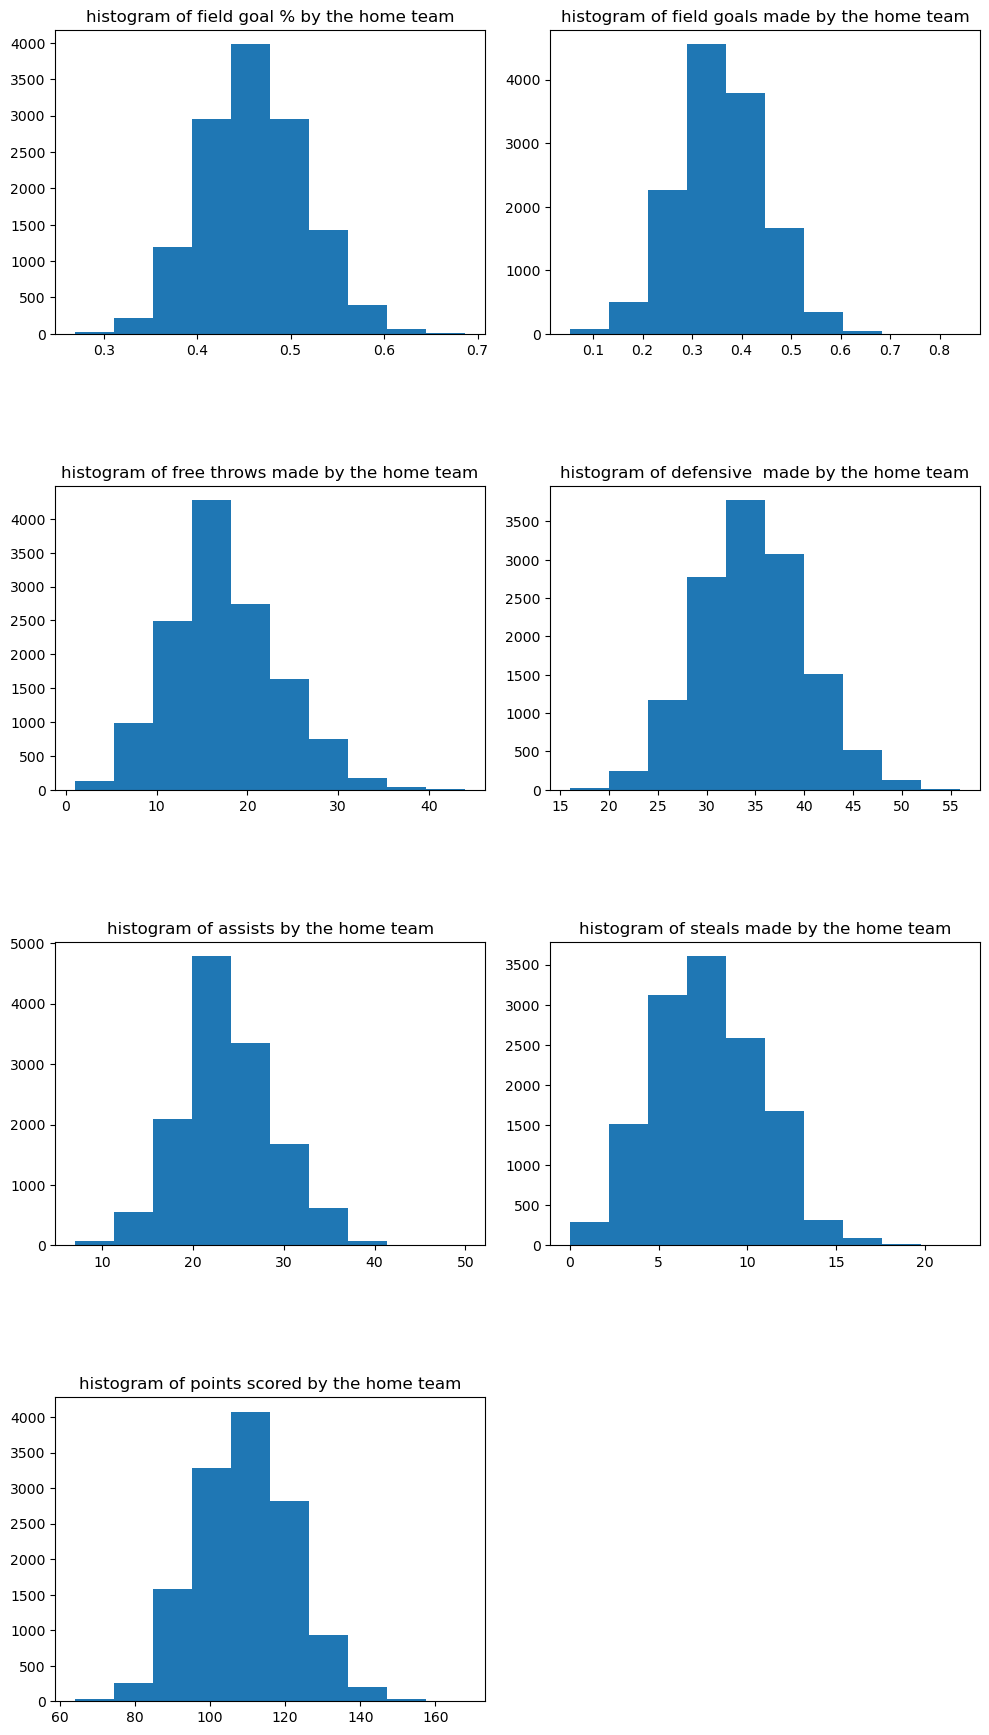

In [111]:
#plot the distribution of each column to see if they are normalized 

plt.figure(figsize=(10,18))


plt.subplot(4, 2, 1)
plt.hist(raw_stat['fg%'])
plt.title('histogram of field goal % by the home team')

plt.subplot(4, 2, 2)
plt.hist(raw_stat['3p%'])
plt.title('histogram of field goals made by the home team')


plt.subplot(4, 2, 3)
plt.hist(raw_stat['ft'])
plt.title('histogram of free throws made by the home team')


plt.subplot(4, 2, 4)
plt.hist(raw_stat['drb'])
plt.title('histogram of defensive  made by the home team')

plt.subplot(4, 2, 5)
plt.hist(raw_stat['ast'])
plt.title('histogram of assists by the home team')

plt.subplot(4, 2, 6)
plt.hist(raw_stat['stl'])
plt.title('histogram of steals made by the home team')

plt.subplot(4, 2, 7)
plt.hist(raw_stat['pts'])
plt.title('histogram of points scored by the home team')

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.5)

#the highly correlated features are normalized 

Text(0.5, 1.0, 'Box plot of points scored')

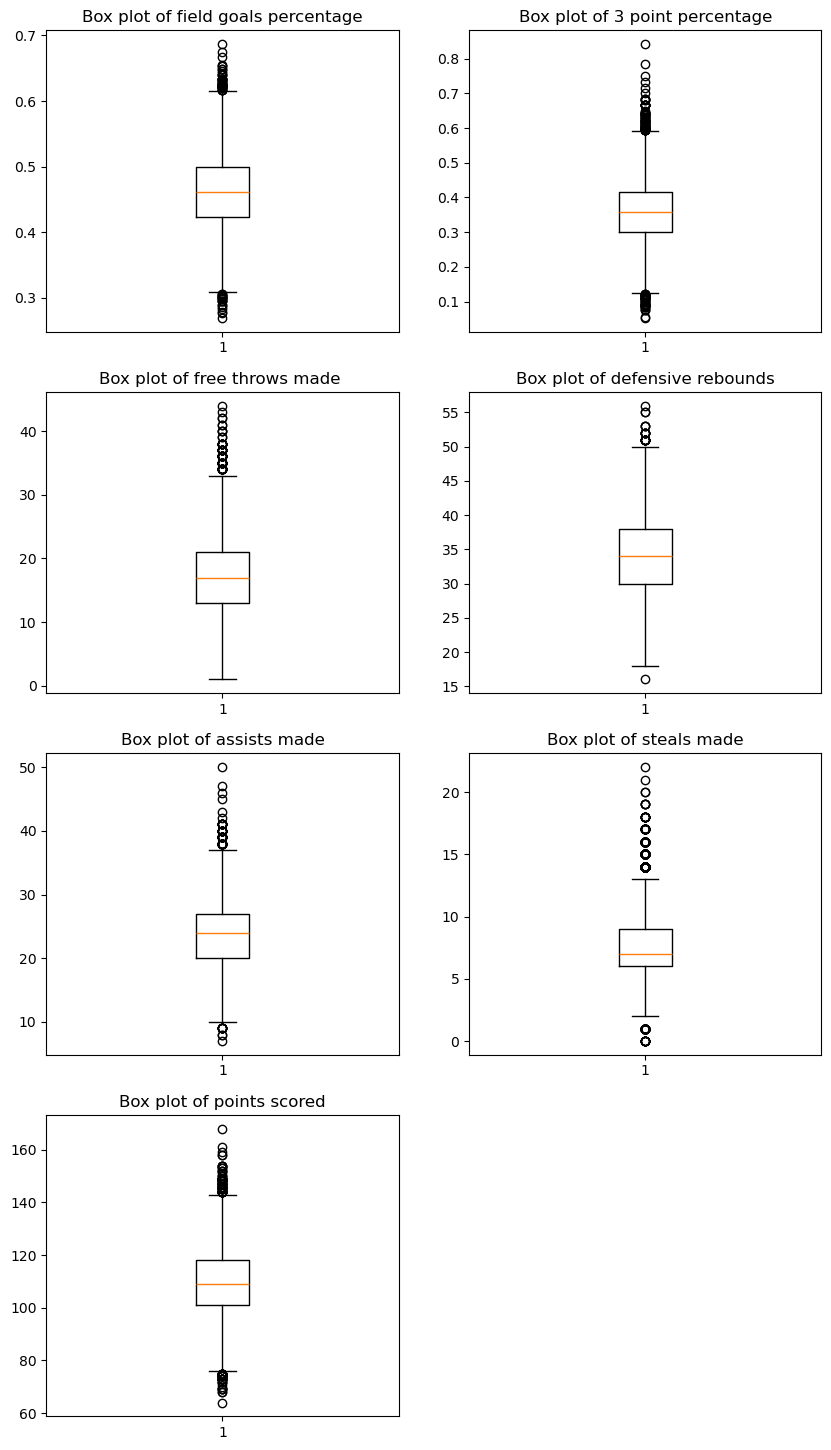

In [101]:
# I can see that these are normally distributed Now let me check for outliers 

plt.figure(figsize=(10,18))

plt.subplot(4, 2, 1)
plt.boxplot(raw_stat["fg%"])
plt.title("Box plot of field goals percentage")

plt.subplot(4, 2, 2)
plt.boxplot(raw_stat["3p%"])
plt.title("Box plot of 3 point percentage")

plt.subplot(4, 2, 3)
plt.boxplot(raw_stat["ft"])
plt.title("Box plot of free throws made ")

plt.subplot(4, 2, 4)
plt.boxplot(raw_stat["drb"])
plt.title("Box plot of defensive rebounds")

plt.subplot(4, 2, 5)
plt.boxplot(raw_stat["ast"])
plt.title("Box plot of assists made")

plt.subplot(4, 2, 6)
plt.boxplot(raw_stat["stl"])
plt.title("Box plot of steals made")

plt.subplot(4, 2, 7)
plt.boxplot(raw_stat["pts"])
plt.title("Box plot of points scored")


In [51]:
#Gonna count the outliers in this dataset. 

def find_outlier(raw_stat, columns, thresholds=np.arange(1,4,0.5)):
    for column in columns:
        q75, q25 = np.percentile(raw_stat[column], [75 ,25])
        iqr = q75 - q25
        print(f'outliers for column:{column}')
        for threshold in thresholds:
            min_val = q25 - (iqr*threshold)
            max_val = q75 + (iqr*threshold)
            outliers = len(np.where((raw_stat[column] > max_val) | (raw_stat[column] < min_val))[0])
            print(f"Threshold: {threshold}, Number of outliers: {outliers}")
        print("\n")



find_outlier(raw_stat, model_feat)

outliers for column:fg%
Threshold: 1.0, Number of outliers: 401
Threshold: 1.5, Number of outliers: 68
Threshold: 2.0, Number of outliers: 4
Threshold: 2.5, Number of outliers: 0
Threshold: 3.0, Number of outliers: 0
Threshold: 3.5, Number of outliers: 0


outliers for column:3p%
Threshold: 1.0, Number of outliers: 618
Threshold: 1.5, Number of outliers: 123
Threshold: 2.0, Number of outliers: 21
Threshold: 2.5, Number of outliers: 5
Threshold: 3.0, Number of outliers: 2
Threshold: 3.5, Number of outliers: 1


outliers for column:ft
Threshold: 1.0, Number of outliers: 462
Threshold: 1.5, Number of outliers: 96
Threshold: 2.0, Number of outliers: 20
Threshold: 2.5, Number of outliers: 4
Threshold: 3.0, Number of outliers: 0
Threshold: 3.5, Number of outliers: 0


outliers for column:drb
Threshold: 1.0, Number of outliers: 294
Threshold: 1.5, Number of outliers: 26
Threshold: 2.0, Number of outliers: 3
Threshold: 2.5, Number of outliers: 0
Threshold: 3.0, Number of outliers: 0
Threshold:

In [87]:
#Winsorized distributions

#winsorize function
def winsorize_column(column, limits):
    return winsorize(column, limits)

# Create a copy of the original DataFrame
winsor_stat = raw_stat.copy()

# Apply the winsorize function to the specified columns in the new DataFrame
for feat in main_feat:
    winsor_stat[feat] = winsorize_column(winsor_stat[feat], (0, 0.10))


In [49]:
#creating an array of the relevant feature sets. 
model_feat = ['fg%', '3p%', 'ft', 'drb', 'ast', 'stl', 'pts']
target_feat = ['won']

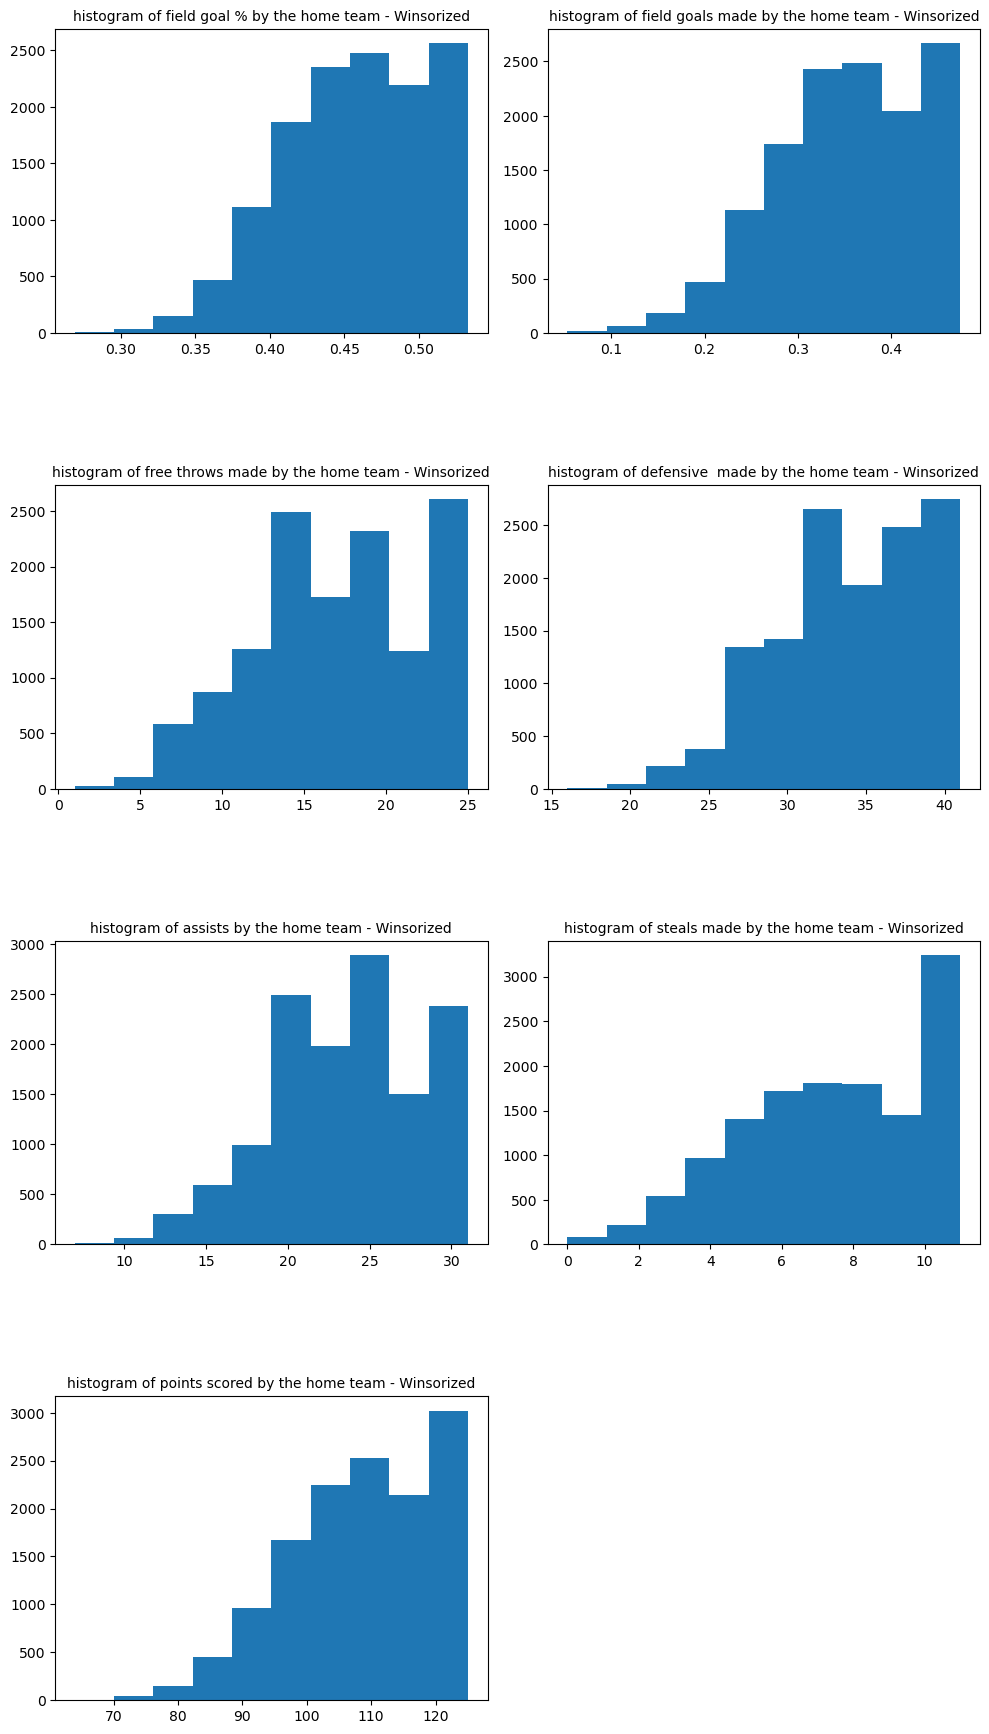

In [109]:
#plot the distribution of each column to see if they are normalized 

plt.figure(figsize=(10,18))


plt.subplot(4, 2, 1)
plt.hist(winsor_stat['fg%'])
plt.title('histogram of field goal % by the home team - Winsorized', fontsize=10)

plt.subplot(4, 2, 2)
plt.hist(winsor_stat['3p%'])
plt.title('histogram of field goals made by the home team - Winsorized', fontsize=10)


plt.subplot(4, 2, 3)
plt.hist(winsor_stat['ft'])
plt.title('histogram of free throws made by the home team - Winsorized', fontsize=10)


plt.subplot(4, 2, 4)
plt.hist(winsor_stat['drb'])
plt.title('histogram of defensive  made by the home team - Winsorized', fontsize=10)

plt.subplot(4, 2, 5)
plt.hist(winsor_stat['ast'])
plt.title('histogram of assists by the home team - Winsorized', fontsize=10)

plt.subplot(4, 2, 6)
plt.hist(winsor_stat['stl'])
plt.title('histogram of steals made by the home team - Winsorized', fontsize=10)

plt.subplot(4, 2, 7)
plt.hist(winsor_stat['pts'])
plt.title('histogram of points scored by the home team - Winsorized', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.5)

#the winsorized features are not normalized

Text(0.5, 1.0, 'Box plot of points scored - Winsorized')

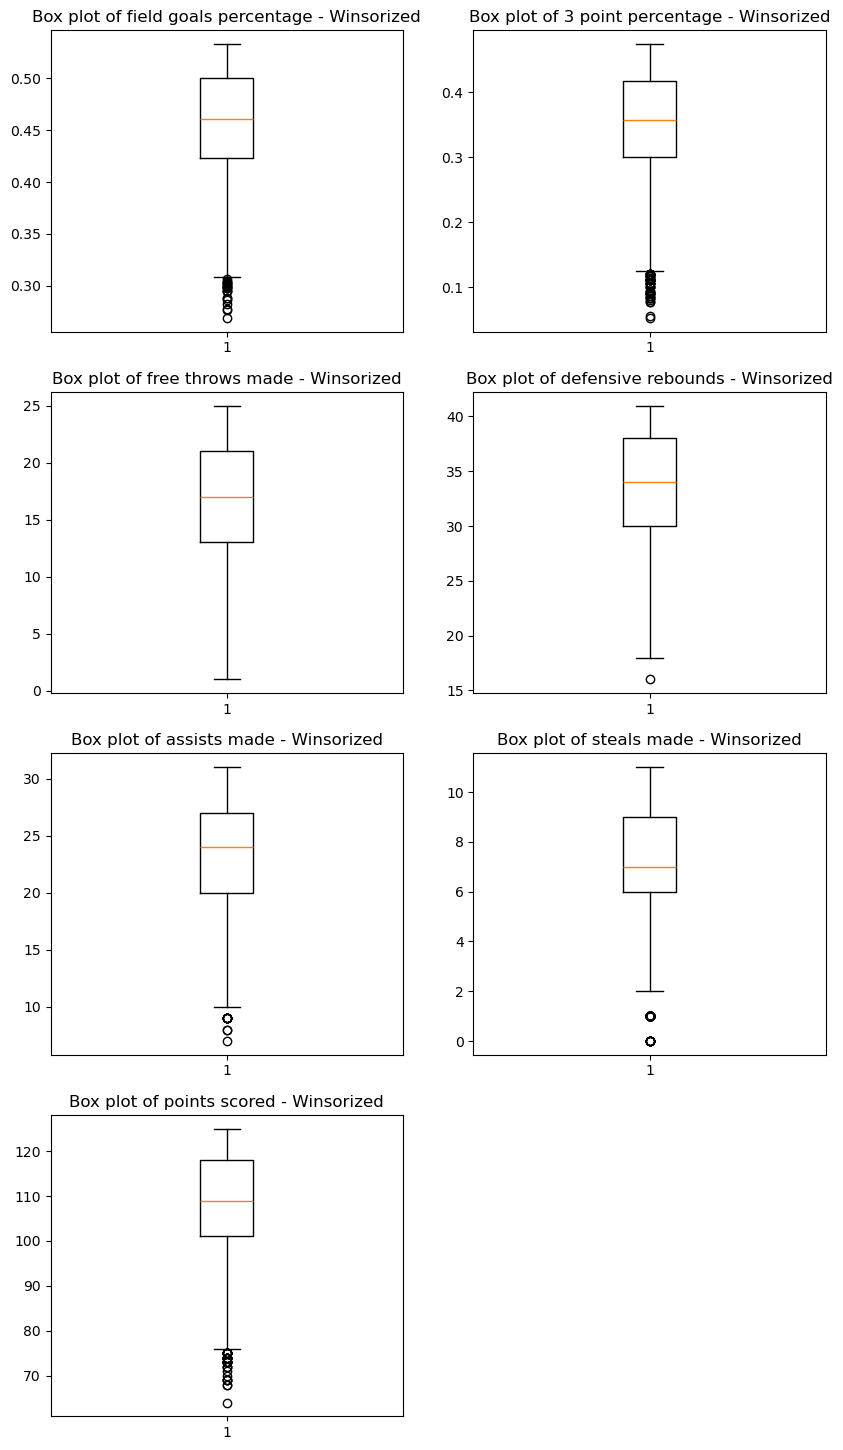

In [103]:
plt.figure(figsize=(10,18))

plt.subplot(4, 2, 1)
plt.boxplot(winsor_stat["fg%"])
plt.title("Box plot of field goals percentage - Winsorized")

plt.subplot(4, 2, 2)
plt.boxplot(winsor_stat["3p%"])
plt.title("Box plot of 3 point percentage - Winsorized")

plt.subplot(4, 2, 3)
plt.boxplot(winsor_stat["ft"])
plt.title("Box plot of free throws made - Winsorized")

plt.subplot(4, 2, 4)
plt.boxplot(winsor_stat["drb"])
plt.title("Box plot of defensive rebounds - Winsorized")

plt.subplot(4, 2, 5)
plt.boxplot(winsor_stat["ast"])
plt.title("Box plot of assists made - Winsorized")

plt.subplot(4, 2, 6)
plt.boxplot(winsor_stat["stl"])
plt.title("Box plot of steals made - Winsorized")

plt.subplot(4, 2, 7)
plt.boxplot(winsor_stat["pts"])
plt.title("Box plot of points scored - Winsorized")


#does a good job of helping with my outliers but my data is no longer normally distributed So I am going to use the original 
#normalized data then scale it  

In [53]:
#Gonna see if outliers are dealt better with winsorization 

def find_outlier_winsor(raw_stat, columns, limits=(0.10, 0.10), thresholds=np.arange(1, 4, 0.5)):
    for column in columns:
        # Apply winsorization
        winsorized_column = winsorize(raw_stat[column], limits=limits)

        # Calculate IQR for the winsorized column
        q75, q25 = np.percentile(winsorized_column, [75, 25])
        iqr = q75 - q25

        print(f"Outliers for column: {column} (after winsorization)")
        for threshold in thresholds:
            min_val = q25 - (iqr * threshold)
            max_val = q75 + (iqr * threshold)
            outliers = len(np.where((winsorized_column > max_val) | (winsorized_column < min_val))[0])
            print(f"Threshold: {threshold}, Number of outliers: {outliers}")
        print("\n")

find_outlier_winsor(raw_stat, model_feat, limits=(0.05, 0.05))

# The outlier have been dealt with. so I will use wonsorized values. 

Outliers for column: fg% (after winsorization)
Threshold: 1.0, Number of outliers: 0
Threshold: 1.5, Number of outliers: 0
Threshold: 2.0, Number of outliers: 0
Threshold: 2.5, Number of outliers: 0
Threshold: 3.0, Number of outliers: 0
Threshold: 3.5, Number of outliers: 0


Outliers for column: 3p% (after winsorization)
Threshold: 1.0, Number of outliers: 0
Threshold: 1.5, Number of outliers: 0
Threshold: 2.0, Number of outliers: 0
Threshold: 2.5, Number of outliers: 0
Threshold: 3.0, Number of outliers: 0
Threshold: 3.5, Number of outliers: 0


Outliers for column: ft (after winsorization)
Threshold: 1.0, Number of outliers: 0
Threshold: 1.5, Number of outliers: 0
Threshold: 2.0, Number of outliers: 0
Threshold: 2.5, Number of outliers: 0
Threshold: 3.0, Number of outliers: 0
Threshold: 3.5, Number of outliers: 0


Outliers for column: drb (after winsorization)
Threshold: 1.0, Number of outliers: 0
Threshold: 1.5, Number of outliers: 0
Threshold: 2.0, Number of outliers: 0
Threshold

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [55]:
#Getting Data redy for Modeling 
stats_data = raw_stat[['fg%', '3p%', 'ft', 'drb', 'ast', 'stl', 'pts']]
stats_target = raw_stat['won']


In [119]:
#scaling the feature set.

scaler = StandardScaler()
stats_data = scaler.fit_transform(stats_data)


In [121]:
#training the data 
X_train, X_test, y_train, y_test = train_test_split(stats_data, stats_target, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [123]:
#make a prediction on the test data 
y_pred_logmodel = logmodel.predict(X_test)


In [125]:
#Evaluation of the Log model

accuracy_logmodel = accuracy_score(y_test, y_pred_logmodel)
class_report_logmodel = classification_report(y_test, y_pred_logmodel)
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logmodel}")
print(f"Classification Report:\n{class_report_logmodel}")


Logistic Regression Model:
Accuracy: 0.7962962962962963
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      1346
        True       0.80      0.78      0.79      1300

    accuracy                           0.80      2646
   macro avg       0.80      0.80      0.80      2646
weighted avg       0.80      0.80      0.80      2646



In [127]:
# Running the same data for the ridge model 
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# Predict using the Ridge Regression model
y_pred_ridge_model = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge_model = mean_squared_error(y_test, y_pred_ridge_model)
print("\nRidge Regression Model:")
print(f"Mean Squared Error: {mse_ridge_model}")
r2 = r2_score(y_test, y_pred_ridge_model)

summary = {
    'Intercept': intercept,
    'Coefficients': coefficients,
    'R-squared': r2,
    'MSE': mse_ridge_model
}

# Convert to a DataFrame for a cleaner display
print(summary)


Ridge Regression Model:
Mean Squared Error: 0.15053846417009037
{'Intercept': 0.5006265429016035, 'Coefficients': array([ 1.67816723e-01,  7.82216499e-02,  6.46049824e-02,  1.87510861e-01,
       -7.72511085e-05,  9.52236396e-02,  1.81338420e-02]), 'R-squared': 0.3976641000060118, 'MSE': 0.15053846417009037}


In [129]:
#Random Forest Modeling 

# Train a Random Forest Classifier
rf_stat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_stat.fit(X_train, y_train)

# Predict using the Random Forest Classifier
y_pred_rf = rf_stat.predict(X_test)

# Evaluate the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{class_report_rf}")


Random Forest Classifier Model:
Accuracy: 0.7834467120181405
Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.80      0.79      1346
        True       0.79      0.77      0.78      1300

    accuracy                           0.78      2646
   macro avg       0.78      0.78      0.78      2646
weighted avg       0.78      0.78      0.78      2646

